# Understanding of the Perceptron

In this tutorial, you will be learing the perceptron algorithm throughly. Firstly, brief history of the perceptron algorithm and its importance in AI is explained. Thereafter, you will learn how to implement the perceptron algorithm from scratch.


### History of the Perceptron

The perceptron algorithm is one of the most important and oldest algorithm in Artificial Intelligence. There has not been any prominent books related to AI and Machine learning in which the perceptron algortihm has not been explained thoroughly, e.g.
    <a href="http://aima.cs.berkeley.edu/">
      Artificial Intelligence: A Modern Approach</a> Peter Norvig,
    <a href="https://work.caltech.edu/telecourse.html">
       Learning From Data</a> Yaser.Abu-Mostafa,
    <a href="https://work.caltech.edu/telecourse.html">
       Pattern Recognition and Machine Learning</a>, Christopher Bishop
    <a href="https://mitpress.mit.edu/books/introduction-machine-learning">
       Introduction to Machine Learning</a> Ethem Alpaydin.
       
Famous american psychologist F.Rosenblatt has published a work whose title is the perceptron a perceiving and recognizing Automaton in Januar 1957. 

Marving Minsky and Papert's book of Perceptrons in 1969 proved that perceptrons which is called a simple form of neural network, could learn anything which perceptrons are capable of representing.

###  The Perceptron

Consider a binary classification problem with $X = \mathbb{R}^d$ and 
$Y=\left\{-1,+1\right\}$. The hypothesis space $\textbf{H}$ of the perceptron consists of all functions of the form $ \\ $
$ h : \textbf{x} \longmapsto sign\left\{ b + \sum_{n=i}^{d} w_i x_i \right\}$, $ \\ $where sign(s) =$\left\{\textrm{ +1 if s > 0, otherwise -1 }\right\}$.
          


#### The Perceptron Convergence Theorem

The perceptron covergence theorem says that the learning algorithm can adjust the connection strengths of a perceptron to match any input data, $\textbf{provided such a match exists}$.
The perceptron learning rule converges to a perfect linear separator when the data points are linearly separpable.

NOTE TO ME

AND GATE OR GATE works but XOR does not


#### The Perceptron Update Rule

$ \textrm{w( t + 1 )} := \textrm{ w( t )}+\textrm{(y ( t )} - \hat y ) \textrm{x( t )}$, $$$$
where $\hat y=sign\textrm{( } w^T \textrm{( t ) x( t ))}$

The solution is always a linear combination of the traning instances:$$$$
$\textbf{w} = \sum_{i} a_i y_i x_i$,$ $ with positive coefficients $a_i>0$. This notion plays also important role in.
<a href="https://youtu.be/_PwhiWxHK8o?t=27m58s">SVM</a>.




In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
class Perceptron():
    def __init__( self ):
        self.weights = np.random.rand(3)
    
    def respond( self, x ):
        #w( t )+(y ( y )−ŷ x( t )↦w(t+1)w( t )+(y ( y )−y^x( t )↦w(t+1)
        prediction = np.dot(self.weights, x)
        if prediction >= 0:
            return 1
        else:
            return -1
        
    def updateWeights( self, x, y, prediction ):
        self.weights = self.weights + (y - prediction) * x

    def train( self, X, Y ):
        learned = False
        iteration = 0
        #fig, ax = plt.subplots()

        while not learned or iteration < 1000:
            globalError = 0
            for i in range(0, X.shape[ 0 ]):
                prediction = self.respond(X[ i ])
                if prediction != Y[ i ]:
                    self.updateWeights(X[ i ], Y[ i ], prediction)
                    globalError += 1
                    #self.drawHyperplane(X, Y,iteration)
                iteration += 1

            if globalError == 0:
                learned = True
                #self.drawHyperplane(X, Y,iteration)
                       
    def drawHyperplane( self, X, Y,iteration):

        a = - self.weights[1] / self.weights[2]
        xx = np.linspace(0, 5)
        yy = a * xx - self.weights[0] / self.weights[2]
        col = np.where(Y > 0, 'b', 'r')
        plt.cla()
        plt.scatter(X[:, 1], X[:, 2], c=col, s=10)
        plt.plot(xx, yy, 'k-')
        plt.title(iteration)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.axis('tight')
        plt.draw()
        plt.pause(0.1)
    

In [5]:
def displayDatapoints( X, Y ):
    col = np.where(Y > 0, 'b', 'r')
    plt.scatter(X[ :, 1 ], X[ :, 2 ], c=col, s=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis('tight')
    plt.show()

In [20]:
def Test( p, X, Y ):
    p.drawHyperplane(X,Y,"Final")
    for i in range(0, X.shape[ 0 ]):
        print("Prediction ", p.respond(X[ i ]))
        print("Truth    ", Y[ i ])

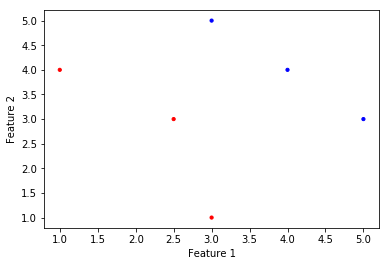

In [21]:

##Linearly sepearable Data
#First colum is for the bias term
X = np.array([ [ 1, 1, 4 ], [ 1, 3, 1 ], [ 1, 2.5, 3 ], [ 1, 4, 4 ], [ 1, 3, 5 ], [ 1, 5, 3 ], ])
Y = np.array([ -1, -1, -1, 1, 1, 1 ])

displayDatapoints(X, Y)


In [22]:
p = Perceptron()
p.train(X, Y)

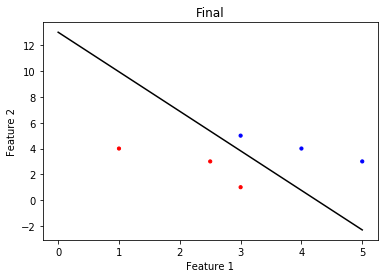

Prediction  -1
Truth     -1
Prediction  -1
Truth     -1
Prediction  -1
Truth     -1
Prediction  1
Truth     1
Prediction  1
Truth     1
Prediction  1
Truth     1


In [23]:
Test(p, X, Y)